# Exercise 9 - Monte Carlo Integration and Rejection Sampling

In this exercise, we will calculate the area between two very special functions and compare the exact result to the result of Monte Carlo Integration. We will then interpret one of these functions as a density and sample from it using rejection sampling.



In the event of a persistent problem, do not hesitate to contact the course instructors under
- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        15.01.2023
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=34630)

### Help
In case you cannot solve a task, you can use the saved values within the `help` directory:
- Load arrays with [Numpy](https://numpy.org/doc/stable/reference/generated/numpy.load.html)
```
np.load('help/array_name.npy')
```
- Load functions, classes and other objects with [Dill](https://dill.readthedocs.io/en/latest/dill.html)
```
import dill
with open('help/some_func.pkl', 'rb') as f:
    func = dill.load(f)
```

to continue working on the other tasks.

# Monte Carlo Integration

The first part of this exercise is about calculating the integral of a difficult function.

We consider the [Batman Curve](https://www.reddit.com/r/pics/comments/j2qjc/do_you_like_batman_do_you_like_math_my_math/) that was posted 11 years ago on Reddit. See [here](https://www.pacifict.com/Examples/Batman/) for an in-depth breakdown of this function. Here we will break it up into two functions. One for the upper part, one for the lower part:

$\begin{align}
    \text{upper}(x) &= \begin{cases}\\
        3\sqrt{1-\left(\frac{x}{7}\right)^2} & \text{, if }|x|>3\\
        \frac{6\sqrt{10}}{7}-0.5|x|+1.5 - \frac{3\sqrt{10}}{7}\sqrt{4-(|x|-1)^2} & \text{, if }3\geq |x| > 1\\
        9-8|x| & \text{, if }1\geq |x| > 0.75\\
        3|x| + 0.75&\text{, if }0.75\geq |x| > 0.5\\
        2.25&\text{, if }0.5\geq |x|\\
    \end{cases}\\
    \text{lower}(x)&=\begin{cases}\\
        -3\sqrt{1-\left(\frac{x}{7}\right)^2} & \text{, if }|x|>4\\
        |\frac{x}{2}| - \frac{x^2}{112}\left(3\sqrt{33}-7\right) - 3 + \sqrt{1-(||x|-2|-1)^2} & \text{, if }4\geq |x|\\
    \end{cases}
\end{align}$

### Task 1

Implement both functions and plot them in the interval $[-7, 7]$.

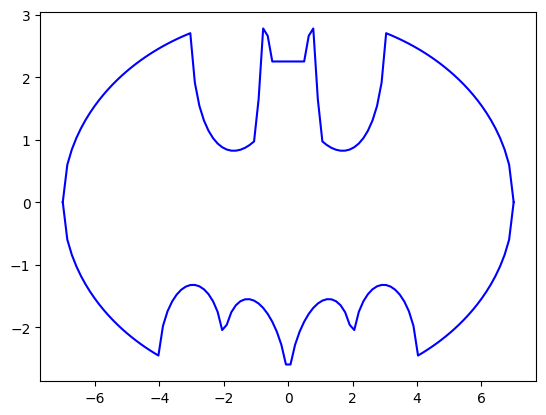

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def lower(x: np.ndarray) -> np.ndarray:
    '''
    Calculates the lower part of the batman function

    @Params:
        x... x-values

    @Returns:
        y-values of lower part
    '''
    
    if np.abs(x) > 4:
        return -3 * np.sqrt(1 - (np.abs(x) / 7)**2)
    return (np.abs(x) / 2) - (x**2 / 112) * (3 * np.sqrt(33) - 7) - 3 + np.sqrt(1 - (np.abs(np.abs(x) - 2) - 1)**2)


def upper(x: np.ndarray) -> np.ndarray:
    '''
    Calculates the upper part of the batman function

    @Params:
        x... x-values

    @Returns:
        y-values of upper part
    '''

    if np.abs(x) > 3:
        return 3 * np.sqrt(1 - (np.abs(x) / 7)**2)
    if np.abs(x) > 1:
        return 6 * np.sqrt(10) / 7 - 0.5 * np.abs(x) + 1.5 - (3 * np.sqrt(10) / 7) * np.sqrt(4 - (np.abs(x) - 1)**2)
    if np.abs(x) > 0.75:
        return 9 - 8 * np.abs(x)
    if np.abs(x) > 0.5:
        return 3 * np.abs(x) + 0.75
    return 2.25

# TODO: plot
x = np.linspace(-7,7,100)
y_upper = list(map(upper, x))
y_lower = list(map(lower, x))
plt.plot(x, y_upper, c='blue')
plt.plot(x, y_lower, c='blue')
plt.show()

## Exact Integral

We are interested in the area between the two curves. That is
\begin{align}
A_{\text{exact}} &= A_{\text{upper}} + A_{\text{lower}}\\
&= \int_{-7}^7 \text{upper}(x) dx - \int_{-7}^7 \text{lower}(x) dx
\end{align}

### Task 2
Calculate size of area between upper and lower as exact as possible.

In [3]:
from typing import Callable
# TODO: calculate exact area


def integral_upper_part_1(x: float) -> float:
    return 3 / 14 * (x * np.sqrt(49 - x ** 2) + 49 * np.arcsin(x / 7))


def integral_upper_part_2(x: float) -> float:
    return 4.21052 * x - 0.25 * x**2 - 0.677631 * (-1 + x) * np.sqrt(3 + 2 * x - x**2) + 2.71052 * np.arcsin(0.5 - 0.5 * x)


def integral_upper_part_3(x: float) -> float:
    return 9 * x - 4 * x**2


def integral_upper_part_4(x: float) -> float:
    return 3 / 2 * x**2 + 0.75 * x


def integral_upper_part_5(x: float) -> float:
    return 2.25 * x


def integral_lower_part_1(x: float) -> float:
    return -integral_upper_part_1(x)


def integral_lower_part_2(x: float) -> float:
    return 1 / 672 * ((np.sign(2 - x) - 1) * (3 * np.sqrt(33) * x**3 - 7 * x**3 - 84 * x**2 - 168 * np.sqrt(-x**2 + 6 * x - 8) * x + 504 * np.sqrt(-x**2 + 6 * x - 8) + 1008 * x + 168 * np.arcsin(3 - x) - 84 * np.pi) + (np.sign(2 - x) + 1) * ((7 - 3 * np.sqrt(33)) * x**3 + 84 * x**2 + 168 * (np.sqrt(-(x - 2) * x) - 6) * x - 168 * np.sqrt(-(x - 2) * x) - 336 * np.arcsin(np.sqrt(1 - x / 2))))


def integrate_numerical(fun: Callable, start: float, end: float, n_steps: float = 100) -> float:
    width = (end - start) / n_steps
    # pillars
    X = np.linspace(start, end, n_steps, endpoint=False) + width / 2
    return np.sum([fun(x) * width for x in X])


# calculate exact area
half_area_upper = (
    integral_upper_part_1(7) - integral_upper_part_1(3)
    + integral_upper_part_2(3) - integral_upper_part_2(1)
    + integral_upper_part_3(1) - integral_upper_part_3(0.75)
    + integral_upper_part_4(0.75) - integral_upper_part_4(0.5)
    + integral_upper_part_5(0.5) - integral_upper_part_5(0)
)
half_area_lower = (
    integral_lower_part_1(7) - integral_lower_part_1(4)
    # indefinite integral had some problems
    + (-20 / 3 - (4 * np.sqrt(33)) / 7 + np.pi)
)
area_exact = 2 * (half_area_upper - half_area_lower)
# calculate area numerically
start = -7
end = 7
n_steps = 10000
area_numerical = integrate_numerical(upper, start, end, n_steps) - integrate_numerical(lower, start, end, n_steps)

# assert that they are close
assert np.isclose(area_numerical, area_exact)
print(area_exact)
# had some problems, so checked if every single part of the function works
ASSERTION_NSTEPS = 10000
# upper part
assert np.isclose(integrate_numerical(upper, 0, 0.5, ASSERTION_NSTEPS), integral_upper_part_5(0.5) - integral_upper_part_5(0))
assert np.isclose(integrate_numerical(upper, 0.5, 0.75, ASSERTION_NSTEPS), integral_upper_part_4(0.75) - integral_upper_part_4(0.5))
assert np.isclose(integrate_numerical(upper, 0.75, 1, ASSERTION_NSTEPS), integral_upper_part_3(1) - integral_upper_part_3(0.75))
assert np.isclose(integrate_numerical(upper, 1, 3, ASSERTION_NSTEPS), integral_upper_part_2(3) - integral_upper_part_2(1))
assert np.isclose(integrate_numerical(upper, 3, 7, ASSERTION_NSTEPS), integral_upper_part_1(7) - integral_upper_part_1(3))
# lower part
assert np.isclose(integrate_numerical(lower, 4, 7, ASSERTION_NSTEPS), integral_lower_part_1(7) - integral_lower_part_1(4))
assert np.isclose(integrate_numerical(lower, 0, 4, ASSERTION_NSTEPS), -20 / 3 - (4 * np.sqrt(33)) / 7 + np.pi)


48.424356596729965


## Monte Carlo Integration

In Monte Carlo integration we approximate the integral with a simple average over random samples. Namely for an integral of a function $f$ over $x$ from a volume $V$ we can draw $N$ samples uniformly and approximate with
\begin{equation}
\int_{x\in V}f(x) dx\approx\frac{|V|}{N}\sum_{i=1}^{N} f(x_i)\,.
\end{equation}


### Task 3

Approximate the area between the curves with Monte Carlo integration.

In [4]:
def mc_integration(func: callable, N: int, u: float, l: float) -> float:
    '''
    Approximates the integral of a given function within an interval using MC Integration.

    @Params:
        func... function to be integrated
        N... number of samples to use
        u... upper boundary of the interval for x
        l... lower boundary of the interval for x (samples are drawn from interval [l, u])

    @Returns:
        approximate integral
    '''

    return (u - l) * np.mean([func(np.random.uniform(l, u)) for _ in range(N)])

# TODO: approximate area
lower_bound = -7
upper_bound = 7
n_samples = 10000
area_mc = mc_integration(upper, n_samples, upper_bound, lower_bound) - mc_integration(lower, n_samples, upper_bound, lower_bound)
print(area_mc)

48.39047708757679


## Convergence Rate

A nice property of Monte Carlo integration besides its simplicity is that we have convergence guarantees.

If we make $K$ estimates of $A$ with $N$ datapoints, then the error measure
\begin{equation}
\sqrt{\frac{1}{K}\sum_{i=1}^K(\hat{A}_N - A)^2}
\end{equation}
should decrease proportional to 
\begin{equation}
\cfrac{1}{\sqrt{N}}\,.
\end{equation}
Here $A$ is the exact area and $\hat{A}_N$ is the estimate of Monte Carlo Integration with $N$ datapoints.

### Task 4

For an increasing number of samples $N$, compute the error measure from above.
Compare it to the promised convergence rate of $\frac{1}{\sqrt{N}}$.

If you did not solve task 2, use a value of $A=48.42$.

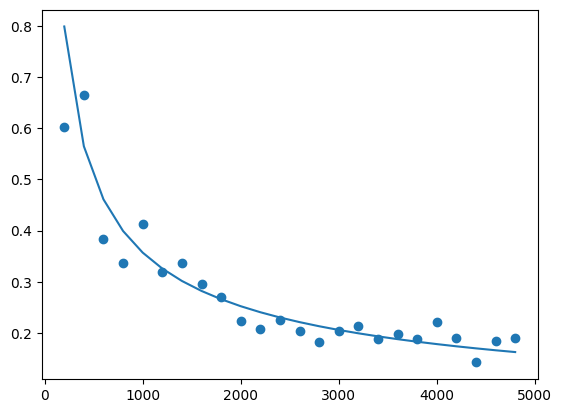

In [5]:
# TODO: check convergence rate
k_tries = 20
lower_bound = -7
upper_bound = 7


def mc_area(n_samples: int) -> float:
    return mc_integration(upper, n_samples, upper_bound, lower_bound) - mc_integration(lower, n_samples, upper_bound, lower_bound)


def mean_error(n_samples: int) -> float:
    mc_areas = np.array([mc_area(n_samples) for _ in range(k_tries)])
    return np.sqrt(np.mean((mc_areas - area_exact)**2))


x = np.arange(200, 5000, 200)
# compute errors
actual_error = np.array([mean_error(n) for n in x])
# compute proportional expected error
expected_error_scaling = lambda n: 1 / np.sqrt(n)
proportionality_factor = np.mean(actual_error / expected_error_scaling(x))
expected_error = lambda n: proportionality_factor * expected_error_scaling(n)
# plot it all
plt.scatter(x, actual_error)
plt.plot(x, expected_error(x))
plt.show()


# Rejection Sampling

In this part of the exercise we want to treat the upper batman curve as an unnormalized probability density.

Our goal is to sample from this density. However since this is not a standard density (like a gaussian or a uniform density), we cannot rely on existing samplers.

This is the part, where we can use **Rejection Sampling:**

Let $p(x)$ be a (unnormalized) target density $q(x)$ be a (unnormalized) standard density, where we know that
\begin{equation}
\forall x: q(x)\geq p(x)
\end{equation}
and we know how to sample from $q$.

Then we can simply perform the following steps:
1. Sample $x\sim q$
2. accept sample with a probability of $\cfrac{p(x)}{q(x)}$

This process is depicted in the following figure:
<div>
<img src="images/rejection.png" width="500"/>
</div>

It is evident that the closer $q$ is to $p$, the more samples are accepted and the more samples .


The reason this works is that the cumulative distribution function of the target density 
\begin{align}
P(x\leq t)=\int\limits_{-\infty}^{t}p(x)dx
\end{align}
can be rewritten as 
\begin{align}
\int\limits_{-\infty}^{t}\cfrac{p(x)}{q(x)}q(x)dx = \int_x\mathbb{1}[x\leq t]\cfrac{p(x)}{q(x)}q(x)dx
\end{align}
which is the expected value of $\cfrac{p(x)}{q(x)}$ under the distribution $q$ for $x\leq t$.
For a more detailed explanation, see [here](https://bookdown.org/rdpeng/advstatcomp/rejection-sampling.html).

### Task 5

Implement rejection sampling for the upper batman curve. Generate samples and check if the samples resemble the target density.

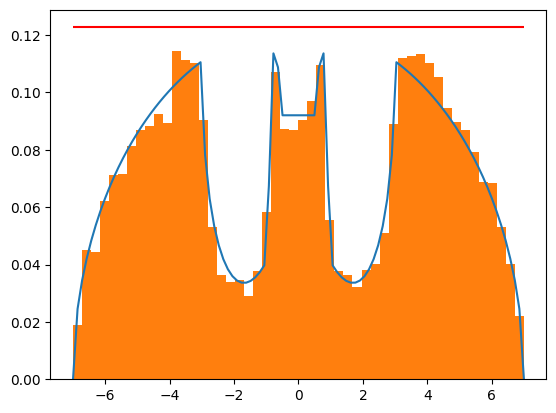

In [18]:
def bernoulli(p: float = 0.5) -> bool:
    return np.random.uniform() <= p


def sample_one(func_target: callable, func_proposal: callable, sampler_proposal: callable):
    # sample something
    sample = sampler_proposal()
    acceptance_prob = func_target(sample) / func_proposal(sample)
    # reject until accepted
    while not bernoulli(acceptance_prob):
        sample = sampler_proposal()
        acceptance_prob = func_target(sample) / func_proposal(sample)
    return sample


def rejection_sampling(func_target: callable, func_proposal: callable, sampler_proposal: callable, N: int) -> np.ndarray:
    '''
    @Params:
        func_target... (unnormalized) target density p(x)
        func_proposal... (unnormalized) proposal density q(x)
        sampler_proposal... produces samples from q(x)
        N... number of proposals to reject or accept

    @Returns:
        samples from target density
    '''

    return np.array([sample_one(func_target, func_proposal, sampler_proposal) for _ in range(N)])


# TODO: sample and check for correctness
def unnormalized_uniform_prob(x: float) -> float:
    return 3


def uniform_sampler() -> float:
    return np.random.uniform(-7, 7)


n_samples = 10000
n_bins = 50
x = np.linspace(-7, 7, 100)
samples = rejection_sampling(upper, unnormalized_uniform_prob, uniform_sampler, n_samples)
area_upper = integrate_numerical(upper, -7, 7, 10000)
plt.plot(x, [upper(sample) / area_upper for sample in x])
plt.hlines(3 / area_upper, -7, 7, colors="red")
plt.hist(samples, bins=n_bins, density=True)
plt.show()
